# Imports

In [1]:
%pip install ultralytics
import ultralytics
import requests
from ultralytics import YOLO
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

ultralytics.checks()

Ultralytics YOLOv8.0.217 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.9/78.2 GB disk)


# Utils


In [2]:
def download_file(url, destination):
    response = requests.get(url)
    with open(destination, 'wb') as file:
        file.write(response.content)

# Download test image

In [3]:
image_url = 'https://raw.githubusercontent.com/system205/PMLDL_Project/main/data/second(combinations)/photo_1_2023-10-08_15-29-38.jpg'
image_path = 'test.jpg'
download_file(image_url, image_path)

image = np.array(Image.open(image_path))
print(f'Image: {image.shape}')

Image: (1280, 960, 3)


# Usage on the image from url

### Predict in Python code

In [4]:
weights_url = 'https://github.com/system205/PMLDL_Project/raw/main/results/weights/best.pt'
weights = 'best.pt'

download_file(weights_url, weights)

# Load a model
model = YOLO(weights)  # load a pretrained model

# Use the model
results = model(image_url)[0]  # predict on an image

# Unpack result
r = results
boxes, names, img, img_shape, speed, = r.boxes, r.names, r.orig_img, r.orig_shape, r.speed

100%|██████████| 227k/227k [00:00<00:00, 6.68MB/s]


image 1/1 /content/photo_1_2023-10-08_15-29-38.jpg: 640x480 1 Bread, 1 Cheese, 1 Eggs, 1 Meat, 1 Milk, 1 Sausages, 3 Tomatoess, 89.1ms
Speed: 11.3ms preprocess, 89.1ms inference, 40.3ms postprocess per image at shape (1, 3, 640, 480)


## With CLI command

In [5]:
!rm -rf runs
!yolo detect predict model=best.pt source='test.jpg'

Ultralytics YOLOv8.0.217 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11129841 parameters, 0 gradients, 28.5 GFLOPs

image 1/1 /content/test.jpg: 640x480 1 Bread, 1 Cheese, 1 Eggs, 1 Meat, 1 Milk, 1 Sausages, 3 Tomatoess, 211.4ms
Speed: 2.5ms preprocess, 211.4ms inference, 102.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


# Show image and results

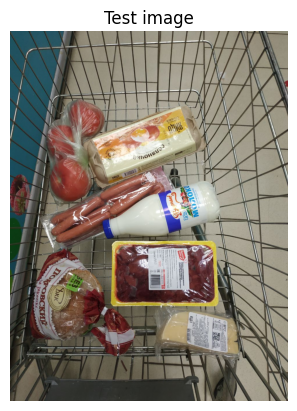

Found classes: Bread Milk Meat Tomatoes Sausages Cheese Eggs


In [6]:
import cv2

# Show image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Test image")
plt.show()

classes = [names[i.item()] for i in boxes.cls]
print(f'Found classes: {" ".join(set(classes))}')

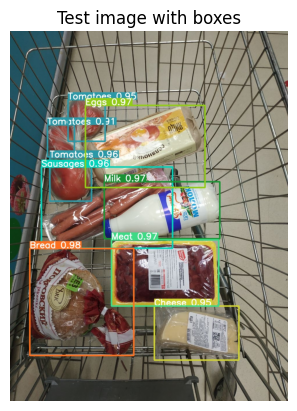

In [7]:
plt.imshow(Image.open(f'runs/detect/predict/{image_path}'))
plt.axis('off')
plt.title("Test image with boxes")
plt.show()

# Video inferencing

In [11]:
!rm -rf runs
!yolo detect predict model=best.pt source='test2.webm' save_txt=True conf=0.715

Ultralytics YOLOv8.0.217 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11129841 parameters, 0 gradients, 28.5 GFLOPs

video 1/1 (1/900) /content/test2.webm: 384x640 (no detections), 113.7ms
video 1/1 (2/900) /content/test2.webm: 384x640 (no detections), 14.1ms
video 1/1 (3/900) /content/test2.webm: 384x640 (no detections), 11.8ms
video 1/1 (4/900) /content/test2.webm: 384x640 (no detections), 13.0ms
video 1/1 (5/900) /content/test2.webm: 384x640 (no detections), 11.3ms
video 1/1 (6/900) /content/test2.webm: 384x640 (no detections), 11.2ms
video 1/1 (7/900) /content/test2.webm: 384x640 (no detections), 11.5ms
video 1/1 (8/900) /content/test2.webm: 384x640 (no detections), 11.1ms
video 1/1 (9/900) /content/test2.webm: 384x640 (no detections), 11.1ms
video 1/1 (10/900) /content/test2.webm: 384x640 (no detections), 11.1ms
video 1/1 (11/900) /content/test2.webm: 384x640 2 Appless, 11.5ms
video 1/1 (12/900) /content/test2.webm: 384x640 3 Ap